### __Group Assignment - Predicting Airbnb Listing Prices in Melbourne, Australia__

--- 

**Kaggle Competition Ends:** Friday, 6 June 2025 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 6 June 2025 @ 11.55pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

### <span style="background-color: yellow;">**Fill out the following information**

- Team Name on Kaggle: `(BUSA3020JMJ)`
- Team Leader and Team Member 1: `(insert here)`
- Team Member 2: `(insert here)`
- Team Member 3: `(insert here)`

---

## Task 1: Problem Description and Initial Data Analysis

- You must clearly explain all your answers in both the Markdown file and the recorded video.

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criterion that is used in this competition to assess forecasting performance, and its pros and cons. (2 marks)     
3. Categorise all variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage


Student in charge of this task: `(insert name here)`

`(Task 1, Text Here - insert more cells as required)`
#1: Forecasting Problem
The purpose of this problem is to create a forecasting model which can estimate an AirBnB listing price within Melbourne, based on appropriately selected features within a regression model which can encapsulate what dictates a high or low listing price. This can be applied within the real world through property owners seeking to find an appropriate price to rent out their property on AirBnB, this maximising their potential earnings without pricing themselves out of the market with a high price, or simply not getting enough utility out of the property by utilizing a low price. Both of which are prevalent risks through adopting an uninformed guess. It is also possible for individuals seeking to rent a property on the AirBnB service to utilize the model to ensure they are getting a fair deal on a property based on its features. Finally, AirBnB themselves could utilize this model to find ensure optimal pricing, maximizing their revenue

#2 Evaluation Criteria
The criterion of Mean Absolute Error to assess forecasting performance has both pros and cons. 
Pros:
Compared to mean squared error, the model is less sensitive to outliers, with an error of X simply contributing X to the mean squared error. If we were using mean squared error as our metric, an error of X would be amplified to X^2. This causing a large error to have a significant effect on the models reported error. Meaning the model would likely be too sensitive to outliers An example being an error of 100 being squared to 10000.

Cons:
Not utilizing a percentage based metric causes the severity of errors to be understated specifically on cheaper properties. This as MAE ignores the size of the principle, and is not a relative calculation unlike MAPE which would recognise the severity of an error more effectively. This as a 300 error would be more significant under a property listed for 500 dollars compared to 2500, when considering the size of the error relative to the pricing (60% vs 12%). This meaning the metric may not be the most appropriate if used on low-end housing.

#3 Variable Types ##NEED TO REDO
|Variable Kind|Number of Features|Feature Names
| --- | --- | --- |
| Numeric | 35 | some text |
| Categorical-Ordinal  | 7 | ID, host_since, host_response_time, host_listings_count, bathrooms, first_review, last_review |
| Categorical-Nominal  | 19 | some text |
| Date  | 3| some text |

#4 Missing Values
Most missing values are not features likely to be included within the model, more focusing on the characteristics of the host that has listed the property. However within dataset there is some key features that has a considerable amount of missing values. This including bedrooms (378 training, 60 test), neighbourhood (1823 train, 1423 test). Within our test dataset, we have a larger amount of review scores missing ranging from 263 to 300. Overall, missing data is not a large issue within the training or test dataset.


#5 Univariate Data Characteristics


In [11]:
#Task 1 code here, insert more cells if required
import pandas as pd

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
pd.set_option('display.max_rows', None)
missingval_test = df_test.isnull().sum()

In [12]:

#Need to remove price 
missingtrain_df = df_train.isnull().sum()
combined_missing = pd.concat([missingtrain_df, missingval_test], axis = 1)
combined_missing = combined_missing.rename(columns = {0: 'Train', 1: 'Test'})
combined_missing

,Train,Test
ID,0,0.0
source,0,0.0
name,1,0.0
description,57,31.0
neighborhood_overview,1823,1424.0
host_name,0,0.0
host_since,0,0.0
host_location,1280,770.0
host_about,2270,1441.0
host_response_time,0,737.0


Most missing values are not features likely to be included within the model, however within dataset there is some key features where there is a considerable amount of missing values. This including bedrooms (378 training, 60 test). Within our test dataset, we have a larger amount of review scores missing ranging from 263 to 300. Overall, missing data is not a large issue within the training or test dataset.


In [14]:
df_train['price'] = df_train['price'].str.replace('$', '')
df_train['price'] = df_train['price'].str.replace(',', '')

count      7000.00
mean        285.65
std        2325.45
min          25.00
25%         117.00
50%         172.00
75%         268.00
max      145160.00
Name: price, dtype: float64


(array([6.994e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.500000e+01, 1.453850e+04, 2.905200e+04, 4.356550e+04,
        5.807900e+04, 7.259250e+04, 8.710600e+04, 1.016195e+05,
        1.161330e+05, 1.306465e+05, 1.451600e+05]),
 <BarContainer object of 10 artists>)

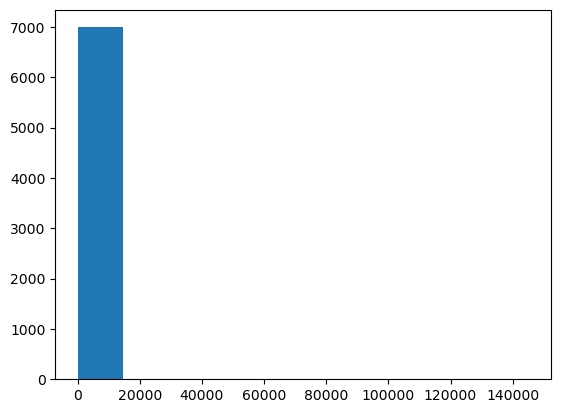

In [40]:
df_train['price'] = df_train['price'].astype(float)
print(df_train['price'].describe().round(2))
price_count = df_train['price'].value_counts()
import matplotlib.pyplot as plt

plt.hist(df_train['price'])
#print(df_train['price'].value_counts().sort_index())

count    6622.00
mean        1.79
std         1.06
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        14.00
Name: bedrooms, dtype: float64


<BarContainer object of 11 artists>

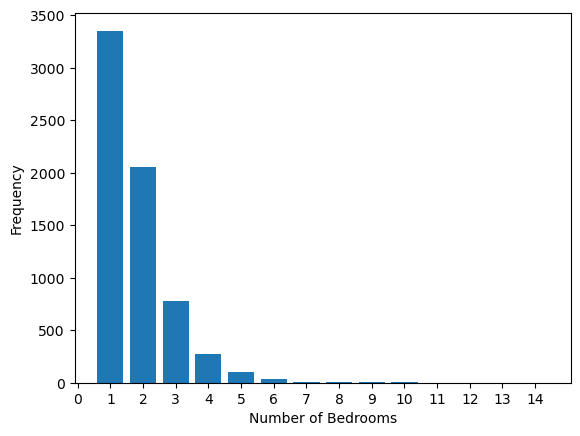

In [16]:
print(df_train['bedrooms'].describe().round(2))
import matplotlib.pyplot as plt
bedroom_count = df_train['bedrooms'].value_counts()
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(0, 15, 1))
plt.bar(bedroom_count.index, bedroom_count.values)

count    7000.00
mean        3.84
std         2.51
min         1.00
25%         2.00
50%         4.00
75%         5.00
max        16.00
Name: accommodates, dtype: float64


<BarContainer object of 16 artists>

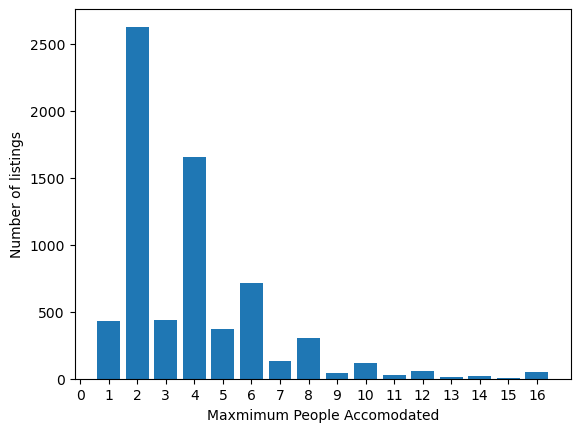

In [17]:
print(df_train['accommodates'].describe().round(2))
import matplotlib.pyplot as plt
accommodates_count = df_train['accommodates'].value_counts()
plt.xlabel('Maxmimum People Accomodated')
plt.ylabel('Number of listings')
plt.xticks(range(0, 17, 1))

plt.bar(accommodates_count.index, accommodates_count.values)


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video. 

**Total Marks: 9**

Student in charge of this task: `(insert name here)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [21]:
## Task 2, Question 1 Code Here
#Mapping Bathrooms
bath_map = {
    '0 baths': 0, 
    '0 shared baths': 0, 
    'Half-bath': 0.5, 
    'Private half-bath': 0.5, 
    'Shared half-bath': 0.5, 
    '1 bath': 1, 
    '1 private bath': 1,
    '1 shared bath': 1,
    '1.5 baths': 1.5,
    '1.5 shared baths': 1.5,
    '2 baths': 2,
    '2 shared baths': 2,
    '2.5 baths': 2.5,
    '2.5 shared baths': 2.5, 
    '3 baths': 3,
    '3 shared baths': 3,
    '3.5 baths': 3.5,
    '3.5 shared baths': 3.5,
    '4 baths': 4,
    '4 shared baths': 4,
    '4.5 baths': 4.5,
    '5 baths': 5, 
    '5 shared baths': 5,
    '5.5 baths': 5.5,
    '5.5 shared baths': 5.5,
    '6 baths': 6,
    '6.5 baths': 6.5,
    '8.5 baths': 8.5,
    '9 baths': 9,
    '9.5 baths': 9.5,
    '10 baths': 10}  

df_train['bathrooms'] = df_train['bathrooms'].map(bath_map)
#df_test['bathrooms'] = df_test['bathrooms'].map(bath_map)

#Mapping Response Rate & Changing to float for imputation
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%', '').astype(float)

#Mapping Acceptance Rate
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].str.replace('%', '').astype(float)

#Price Variable Was cleaned in section 1

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

In [24]:
## Task 2, Question 2 Code Here
#Features 'has_gym' and 'has_hot_tub' From Amenities Column
df_train['has_gym'] = df_train['amenities'].str.contains('gym', case=False).astype(int)
df_train['has_hot_tub'] = df_train['amenities'].str.contains('hot tub', case=False).astype(int)
df_test['has_gym'] = df_test['amenities'].str.contains('gym', case=False).astype(int)
df_test['has_hot_tub'] = df_test['amenities'].str.contains('hot tub', case=False).astype(int)

#Feature 'Year listed' (assuming first review is indicator of listing date)
from datetime import datetime
df_train['first_review']= pd.to_datetime(df_train['first_review'])
df_train['Year_listed'] = df_train['first_review'].dt.year
df_test['first_review']= pd.to_datetime(df_test['first_review'])
df_test['Year_listed'] = df_test['first_review'].dt.year

#Checking If New Features Are Relevant to Model
print(df_train['has_gym'].value_counts())
print(df_train['has_hot_tub'].value_counts())


has_gym
0    5455
1    1545
Name: count, dtype: int64
has_hot_tub
0    6303
1     697
Name: count, dtype: int64


C:\Users\Jett\AppData\Local\Temp\ipykernel_21772\4222849802.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train['first_review']= pd.to_datetime(df_train['first_review'])


`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [27]:
## Task 2, Question 3 Code Here
#Importing SimpleImputer
from sklearn.impute import SimpleImputer

num_columns =  ['ID', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'price', 'has_gym', 'has_hot_tub']

cat_columns = ['source', 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities',
       'has_availability', 'first_review', 'last_review', 'instant_bookable']

df_train.fillna(df_train[num_columns].mean(), inplace=True)
df_train.fillna(df_train[cat_columns].mode().iloc[0], inplace=True)

print(df_train.isnull().sum())

ID                                              0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0


`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [30]:
## Task 2, Question 4 Code Here
import numpy as np
top5={col: df_train[col].value_counts().nlargest(5).index
    for col in cat_columns
     }

for col in cat_columns:
    df_train[col] = df_train[col].where(df_train[col].isin(top5[col]), 'Other')



`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.
(1 mark)

In [33]:
## Task 2, Question 5 Code Here
#Removing Unuseful Variables
df_train=df_train.drop(['neighborhood_overview'], axis=1)
df_train=df_train.drop(['description'], axis=1)
df_train=df_train.drop(['neighbourhood'], axis=1)

`(Task 2, Question 5 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
- 
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `(insert name here)`

In [37]:
#Task 3 code here

`(Task 3 - insert more cells as required)`

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---